1 - Extract values of the following 8 features from the data file AmesHousing.txt: Overall Qual,
Gr Liv Area, Total Bsmt SF, Bedroom AbvGr, Garage Area, Lot Area, TotRms AbvGrd,
SalePrice, and visualize data using scatter plots with Sale Price being the y-axis and another
feature being the x-axis.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

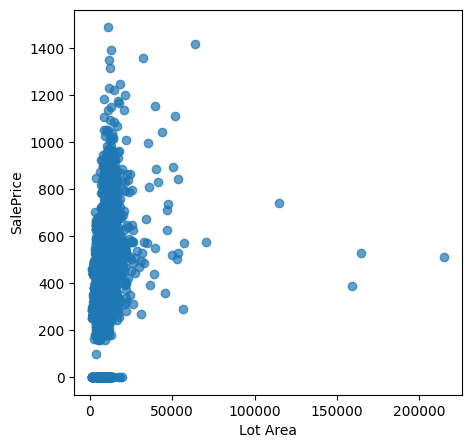

In [31]:
columns = ['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Bedroom AbvGr',
           'Garage Area', 'Lot Area', 'TotRms AbvGrd', 'SalePrice']

#load the dataset
df = pd.read_csv('AmesHousing.txt',
                 sep='\t',
                 usecols=columns  #use the columns list to label column headers
                 )

# df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',
#                  sep='\t',
#                  usecols=columns
# )

#all values are quantitative, no need to convert words to numbers
#drop any naans
df = df.dropna(axis=0)

#visualize data with scatterplot - y-axis = sale price, x-axis = lot area
plt.figure(figsize=(5,5))  
plt.scatter(df.iloc[:, 0], df.iloc[:, 6], alpha=0.7)  #changed opacity for better visual display
plt.xlabel(df.columns[0]) 
plt.ylabel(df.columns[7])  
plt.show()



2 - Use scikit-learn to fit a simple regression model with SalePrice being the target variable and
Lot Area being the feature. Show the scatter plot of the data and the regression line in the
same figure.

Slope: 2.700
Intercept: 153436.864


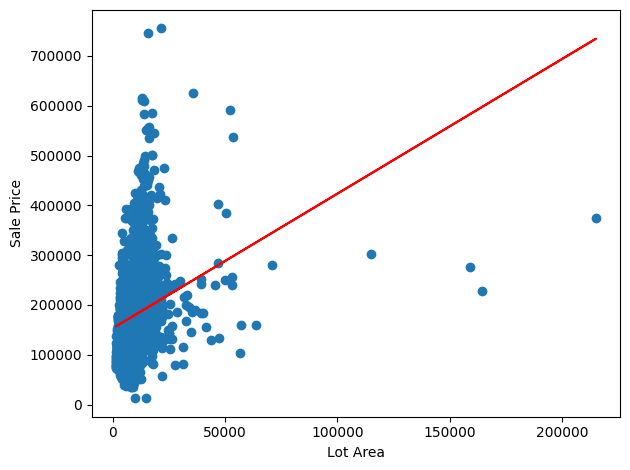

In [32]:
#create instance of linear regression model, train it on our data
slr = LinearRegression()
X = df[['Lot Area']].values #the vector of our vals
y = df['SalePrice'].values #testing data
slr.fit(X, y)  
y_pred = slr.predict(X)
print(f"Slope: {slr.coef_[0]:.3f}")  #what is the coef and intercept stuff
print(f'Intercept: {slr.intercept_:.3f}')

#plot the data
plt.scatter(X, y)
plt.plot(X, y_pred, color = 'red') #plot the regression line
plt.xlabel('Lot Area') 
plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()



3 - Use scikit-learn to fit a multiple regression model with SalePrice being the target variable and
the remaining 7 variables being the features. Show the values of the regression coefficients
and the R2 value.

In [33]:
#use seven features to predict the sale price with multiple regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

target = 'SalePrice'
features = df.columns[df.columns != target]

X = df[features].values # 7 dimensional
y = df[target].values #1 dimensional

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 123
)

#create instance of linear regression, train model with training data, test model with testing data
lin = LinearRegression()
lin.fit(X_train, y_train)
y_train_pred = lin.predict(X_train)
y_test_pred = lin.predict(X_test)

#regression coefficients
print("Regression Coefficients:")
for feature, coef in zip(features, lin.coef_):
    print(f"{feature}: {coef:.3f}")

#R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'\nR^2 train: {r2_train:.2f}')
print(f'R^2 test: {r2_test:.2f}')


Regression Coefficients:
Lot Area: 0.750
Overall Qual: 22820.277
Total Bsmt SF: 31.609
Gr Liv Area: 60.181
Bedroom AbvGr: -10417.903
TotRms AbvGrd: -55.492
Garage Area: 55.042

R^2 train: 0.80
R^2 test: 0.77


4 -  From the scatter plots in Problem 1, you can see some outliers. Remove those outliers with
Lot Area > 100, 000, Total Bsmt SF > 3000, Gr Liv Area > 4000, TotRms AbvGrd > 12, or
Garage Area > 1200 from the data, and repeat Problems 2 and 3. Plot the regression lines
in Problem 2 and this Problem in the same figure. Comparing the R2 value in this problem
with that of Problem 3, what do you observe?

Slope: 5.237
Intercept: 128105.150


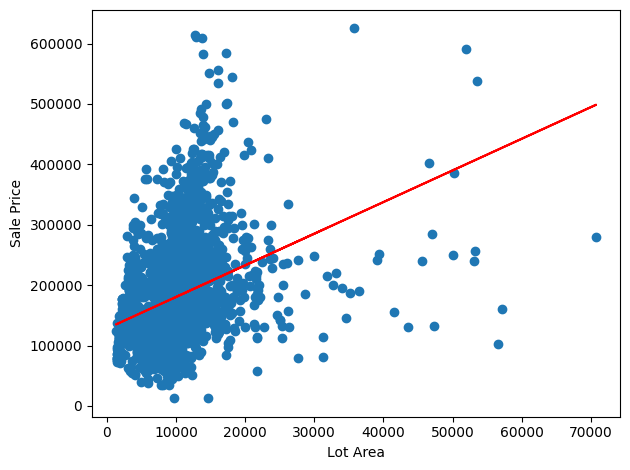

Regression Coefficients:
Lot Area: 1.441
Overall Qual: 21779.704
Total Bsmt SF: 40.490
Gr Liv Area: 60.264
Bedroom AbvGr: -12645.039
TotRms AbvGrd: 844.865
Garage Area: 48.831

R^2 train: 0.83
R^2 test: 0.84


In [36]:
#redoing problem 2 and 3 by removing outliers - 
conditions = (
    (df['Lot Area'] > 100000) |
    (df['Total Bsmt SF'] > 3000) |
    (df['Gr Liv Area'] > 4000) |
    (df['TotRms AbvGrd'] > 12) |
    (df['Garage Area'] > 1200)
)

#clean the dataset by removing any values that meet conditions
df = df[~conditions]

#redo problem 2 with cleaned data
slr = LinearRegression()
X = df[['Lot Area']].values #the vector of our vals
y = df['SalePrice'].values #testing data
slr.fit(X, y)  
y_pred = slr.predict(X)
print(f"Slope: {slr.coef_[0]:.3f}")  #what is the coef and intercept stuff
print(f'Intercept: {slr.intercept_:.3f}')

#plot the data
plt.scatter(X, y)
plt.plot(X, y_pred, color = 'red') #plot the regression line
plt.xlabel('Lot Area') 
plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()

#redo problem 3 with cleaned data
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

target = 'SalePrice'
features = df.columns[df.columns != target]

X = df[features].values # 7 dimensional
y = df[target].values #1 dimensional

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 123
)

#create instance of linear regression, train model with training data, test model with testing data
lin = LinearRegression()
lin.fit(X_train, y_train)
y_train_pred = lin.predict(X_train)
y_test_pred = lin.predict(X_test)

#regression coefficients
print("Regression Coefficients:")
for feature, coef in zip(features, lin.coef_):
    print(f"{feature}: {coef:.3f}")

#R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'\nR^2 train: {r2_train:.2f}')
print(f'R^2 test: {r2_test:.2f}')


Response to final part of Question 4: I observe that the R^2 value generated using the cleaned dataset (with the outliers removed) is higher than that of the dataset containing outliers, for both the training and test R^2 values generated. This makes sense because the R^2 value represents the proportion of variance in Sale Price that can be explained by the feature variables. Removing outliers reduces total variance and residual variance in the Sale Price, which improves the model's ability to explain the remaining data.